## 获取数据的方式

1. 从数据库中读取

- 关系型数据库
    - SQLite
    - MySQL：`pip3 install PyMySQL`
    - PostgreSQL
- 非关系型数据库
    - redis
    - mongodb: `pip3 install pymongo`

2. 从保存数据的文件中读取

- excel: pd.read_excel()
- csv: pd.read_csv()
- json: pd.read_json()

3. 从免费的数据集中下载

- kaggle: www.kaggle.com
- 模块中集成：sklearn, seaborn

4. 利用爬虫技术从网页上获得

- 使用request模块
- 使用scrapy模块
- 其它开源框架

5. 通过接口获得

### 爬虫示例1

安装: pip3 install requests

代码示例：（具体代码见/Users/qiwsir/Documents/Codes/phei_data_feature/lesson03/crawler_jd.py)

### 爬虫示例2

安装：pip3 install Scrapy

官方网站：（https://doc.scrapy.org）

基本使用流程：

- 新建项目 (Project)：新建一个新的爬虫项目
- 明确目标（Items）：明确你想要抓取的目标
- 制作爬虫（Spider）：制作爬虫开始爬取网页
- 存储内容（Pipeline）：设计管道存储爬取内容

首先要安装：`pip3 install Scrapy`

然后就按部就班地创建爬虫项目。

1. 新建项目（fiveone）

进入到某个工作目录中，执行：

```
$ scrapy startproject fiveone
```

得到一个目录fiveone，里面的结构如下：


```
qiwsirs-MacBook-Pro:fiveone qiwsir$ tree
.
├── fiveone
│   ├── __init__.py
│   ├── __pycache__
│   ├── items.py
│   ├── middlewares.py
│   ├── pipelines.py
│   ├── settings.py
│   └── spiders
│       ├── __init__.py
│       └── __pycache__
└── scrapy.cfg

4 directories, 7 files
```

各个文件的说明：

- scrapy.cfg：项目的配置文件
- fiveone/：项目的 Python 模块，将会从这里引用代码
- fiveone/items.py：项目的 items 文件
- fiveone/pipelines.py：项目的 pipelines 文件
- fiveone/settings.py：项目的设置文件
- fiveone/spiders/：存储爬虫的目录

所谓爬虫，是用户自己编写类，定义用于下载的 URL 列表、跟踪链接的方案、解析网页内容的方式，以此来提取 items。 并且这个类，必须要继承scrapy.spider.BaseSpider，并确定三个强制的属性：

- name：爬虫的识别名称，必须是唯一的，在不同的爬虫中你必须定义不同的名字。
- start_urls：爬取的 URL 列表。爬虫从这里开始抓取数据，所以，第一次下载的数据将会从这些 urls 开始。其他子 URL 将会从这些起始 URL 中继承性生成。
- parse()：解析的方法，调用的时候传入从每一个 URL 传回的 Response 对象作为唯一参数，负责解析并匹配抓取的数据(解析为 item)，跟踪更多的 URL。

写一只爬虫，命名为job_spider.py，保存在 fiveone\spiders 目录下。

(代码内容：/Users/qiwsir/Documents/Codes/phei_data_feature/lesson03)

此时在fiveone目录里面执行：`scrapy crawl job`

可以看到爬取的内容

保存信息的最简单的方法是通过 Feed exports，主要有四种：JSON，JSON lines，CSV，XML。 我们将结果用最常用的 JSON 导出，命令如下：

```
scrapy crawl job -o job.json -t json  
```

- -o 后面是导出文件名，
- -t 后面是导出类型。

### 爬虫示例3

专门爬微博的框架：https://github.com/qiwsir/weibospider


In [1]:
### 通过接口获取数据示例

import requests
wb = requests.get('http://api.apiopen.top/singlePoetry')
wb.text


'{"code":200,"message":"成功!","result":{"author":"许浑","origin":"金陵怀古","category":"古诗文-抒情-怀古","content":"玉树歌残王气终，景阳兵合戍楼空。"}}'

## 数据质量

### 质量标准

- 精确性
- 完整性
- 一致性
- 有效性
- 唯一性
- 权威性

### 常见错误

- 缺失数据
- 重复数据
- 无关和无效数据
- 数值的单位错误
- 数据错误：如日期格式不对，数字是全角
- 一致性错误：数据超出正常范围，逻辑上不合理，互相矛盾

### 产生错误的原因

- 录入信息缺失或者有误
- 业务系统不健全

## 数据清洗

**More data beats clever algorithms, but better data beats more data.** -- Peter Norvig

### 数据规整

1. 随机抽取样本

In [333]:
import pandas as pd
df = pd.read_excel("/Users/qiwsir/Documents/Codes/DataSet/major-league-baseball/MLBPlayerSalaries.xlsx")
df.head()

,Year,Player,Salary,Position,Team
0,1988,Mike Witt,1400000,Pitcher,Los Angeles Angels
1,1988,George Hendrick,989333,Outfielder,Los Angeles Angels
2,1988,Chili Davis,950000,Outfielder,Los Angeles Angels
3,1988,Brian Downing,900000,Designated Hitter,Los Angeles Angels
4,1988,Bob Boone,883000,Catcher,Los Angeles Angels


In [3]:
df.shape

(19543, 5)

In [4]:
df.sample()

,Year,Player,Salary,Position,Team
4721,1994,Darnell Coles,500000,Third Baseman,Toronto Blue Jays


In [334]:
df.sample(n=20)

,Year,Player,Salary,Position,Team
12323,2003,Neifi Perez,1500000,Shortstop,San Francisco Giants
4340,1993,Wes Chamberlain,250000,Outfielder,Philadelphia Phillies
12957,2004,Josh Phelps,342000,First Baseman,Toronto Blue Jays
9755,2000,Alan Mills,3000000,Pitcher,Los Angeles Dodgers
9637,2000,Jimmy Haynes,500000,Pitcher,Milwaukee Brewers
7445,1997,Al Martin,2266666,Outfielder,Pittsburgh Pirates
3829,1992,Dion James,250000,Outfielder,New York Yankees
691,1989,Claudell Washington,975000,Outfielder,Los Angeles Angels
13795,2005,Vinny Chulk,326000,Pitcher,Toronto Blue Jays
5359,1994,Mike Gallego,1575000,Shortstop,New York Yankees


In [6]:
# 用下面的方法，等效实现随机抽取中sample()
import numpy as np
rs = np.random.choice(df.index.values, 20)
df20 = df.loc[rs]
df20


,Year,Player,Salary,Position,Team
7625,1997,Brian L. Hunter,310000,Outfielder,Detroit Tigers
8072,1998,Russ Davis,1000000,Third Baseman,Seattle Mariners
9706,2000,Jeremi Gonzalez,265000,Pitcher,Chicago Cubs
9560,2000,Jeff Tam,240000,Pitcher,Oakland Athletics
12611,2003,C.J. Nitkowski,550000,Pitcher,Texas Rangers
17750,2009,Willie Bloomquist,1400000,Second Baseman,Kansas City Royals
17017,2008,Gavin Floyd,400000,Pitcher,Chicago White Sox
18954,2011,Rafael Furcal,13000000,Shortstop,Los Angeles Dodgers
16329,2008,Manny Acosta,392500,Pitcher,Atlanta Braves
19172,2011,Matt Wieters,452250,Catcher,Baltimore Orioles


In [335]:
df.sample?

In [336]:
dfper = df.sample(frac=1)    #frac=1，表示从原数据集中取出100%的样本，但是随机的。所以顺序会变化
dfper.head()

,Year,Player,Salary,Position,Team
17295,2009,Yusmeiro Petit,411500,Pitcher,Arizona Diamondbacks
9083,1999,Jeff Reboulet,525000,Second Baseman,Baltimore Orioles
19295,2011,Pedro Strop,416000,Outfielder,Texas Rangers
17994,2010,Billy Wagner,6750000,Pitcher,Atlanta Braves
4646,1994,Damion Easley,170000,Shortstop,Los Angeles Angels


In [9]:
dfper.shape

(19543, 5)

In [337]:
hdf = df.sample(frac=0.5)    #取出50%
hdf.shape

(9772, 5)

In [338]:
# 增加一个权重
df['Weights'] = np.where(df['Year'] <= 2000, .75, .25)    #注意函数np.where()的用法，等效于条件表达式
df.head()

,Year,Player,Salary,Position,Team,Weights
0,1988,Mike Witt,1400000,Pitcher,Los Angeles Angels,0.75
1,1988,George Hendrick,989333,Outfielder,Los Angeles Angels,0.75
2,1988,Chili Davis,950000,Outfielder,Los Angeles Angels,0.75
3,1988,Brian Downing,900000,Designated Hitter,Los Angeles Angels,0.75
4,1988,Bob Boone,883000,Catcher,Los Angeles Angels,0.75


In [339]:
# 根据权重取数据
wdf = df.sample(100, weights="Weights")

In [340]:
wdf

,Year,Player,Salary,Position,Team,Weights
9389,1999,Brian Moehler,466666,Pitcher,Detroit Tigers,0.75
7161,1997,Tyler Houston,185000,Catcher,Chicago Cubs,0.75
6209,1996,Tim Harkrider,109000,Shortstop,Los Angeles Angels,0.75
13673,2004,Jorge Posada,9000000,Catcher,New York Yankees,0.25
8174,1998,Mike Mussina,6523143,Pitcher,Baltimore Orioles,0.75
5906,1995,Al Martin,375000,Outfielder,Pittsburgh Pirates,0.75
3547,1992,Dave Eiland,135000,Pitcher,San Diego Padres,0.75
7936,1998,Bob Patterson,950000,Pitcher,Chicago Cubs,0.75
3626,1992,Juan Gonzalez,280000,Outfielder,Texas Rangers,0.75
3130,1992,Jeff Bagwell,350000,First Baseman,Houston Astros,0.75


In [341]:
df[df['Salary'] > 20000000].sample(frac=0.1)    #根据条件抽样

,Year,Player,Salary,Position,Team,Weights
18263,2010,Johan Santana,20144707,Pitcher,New York Mets,0.25
14499,2005,Alex Rodriguez,26000000,Third Baseman,New York Yankees,0.25
17024,2008,Jason Giambi,23428571,Designated Hitter,New York Yankees,0.25


2. 数据合并

In [342]:
# 轴向连接: pd.concat()
import pandas as pd
df1 = pd.DataFrame({"one": [10, 11, 12], "two": [20, 21, 22]})
df2 = pd.DataFrame({"one": [100, 101, 102], "three": [300, 301, 302]})
pd.concat([df1, df2])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


,one,three,two
0,10,NaN,20.0
1,11,NaN,21.0
2,12,NaN,22.0
0,100,300.0,NaN
1,101,301.0,NaN
2,102,302.0,NaN


In [343]:
pd.concat?

In [344]:
pd.concat([df1, df2], ignore_index=True)    #忽略原来的索引，新得到的DataFrame索引从新排列

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,one,three,two
0,10,NaN,20.0
1,11,NaN,21.0
2,12,NaN,22.0
3,100,300.0,NaN
4,101,301.0,NaN
5,102,302.0,NaN


In [345]:
pd.concat([df1, df2], keys=['df1', 'df2'])    #以多级索引的方式表示数据来源

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


one  three   two
df1 0   10    NaN  20.0
    1   11    NaN  21.0
    2   12    NaN  22.0
df2 0  100  300.0   NaN
    1  101  301.0   NaN
    2  102  302.0   NaN

In [21]:
pd.concat([df1, df2], axis=1)    #默认axis=0, 此处设置为沿着1轴方向合并

,one,two,one,three
0,10,20,100,300
1,11,21,101,301
2,12,22,102,302


In [346]:
df1.index = ["a", 'b', 'c']
df2.index = ['a', 'd', 'c']
pd.concat([df1, df2], axis=1)    #default: join='out'

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,one,two,one,three
a,10.0,20.0,100.0,300.0
b,11.0,21.0,NaN,NaN
c,12.0,22.0,102.0,302.0
d,NaN,NaN,101.0,301.0


In [23]:
pd.concat([df1, df2], axis=1, join='inner')

,one,two,one,three
a,10,20,100,300
c,12,22,102,302


In [347]:
# 向DataFrame中追加记录：df.append()
df = df1
df

,one,two
a,10,20
b,11,21
c,12,22


In [32]:
df.append(df2, ignore_index=False)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,one,three,two
a,10,NaN,20.0
b,11,NaN,21.0
c,12,NaN,22.0
a,100,300.0,NaN
d,101,301.0,NaN
c,102,302.0,NaN


In [33]:
# 合并数据
pd.merge?

In [348]:
d_left = pd.DataFrame({"mark":["a", "b", "c", "a", "b"], "leftvalue":[10, 20, 30, 40, 50]})
d_right = pd.DataFrame({"mark":["a", "c", "d"], "rightvalue":[100, 200, 300]})

In [349]:
pd.merge(d_left, d_right)    #default: how='inner'

,mark,leftvalue,rightvalue
0,a,10,100
1,a,40,100
2,c,30,200


In [36]:
pd.merge(d_left, d_right, on='mark',  how='inner')

,mark,leftvalue,rightvalue
0,a,10,100
1,a,40,100
2,c,30,200


In [350]:
d_left['k1'] = ["one", 'two', 'three', 'one', 'two']
d_right['k2'] = ['one', 'two', 'three']

In [351]:
pd.merge(d_left, d_right, on='mark',  how='inner')

,mark,leftvalue,k1,rightvalue,k2
0,a,10,one,100,one
1,a,40,one,100,one
2,c,30,three,200,two


In [352]:
pd.merge(d_left, d_right, how='left')

,mark,leftvalue,k1,rightvalue,k2
0,a,10,one,100.0,one
1,b,20,two,NaN,NaN
2,c,30,three,200.0,two
3,a,40,one,100.0,one
4,b,50,two,NaN,NaN


In [53]:
# 另外一种合并方式
import numpy as np
d1 = pd.DataFrame({"name": ["tom", 'jack', 'rose'], 'age':[21, np.nan, np.nan]})
d2 = pd.DataFrame({"name": ["tom", "jack"], 'age':[10, 22], 'mark':['A', 'B']})
d1.combine_first(d2)

,age,mark,name
0,21.0,A,tom
1,22.0,B,jack
2,NaN,NaN,rose


3. 数据类型转化

In [357]:
df = pd.DataFrame([{'col1':'a', 'col2':'1'}, {'col1':'b', 'col2':'2'}])
df.dtypes

col1    object
col2    object
dtype: object

In [359]:
pd.to_numeric(df['col2'])

0    1
1    2
Name: col2, dtype: int64

In [354]:
df

,col1,col2
0,a,1
1,b,2


In [355]:
df['col2'] = df['col2'].astype('int')    #常用的，一种简单的类型转化方式，也是一种强化转化
df.dtypes

col1    object
col2     int64
dtype: object

In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
col1    2 non-null object
col2    2 non-null int64
dtypes: int64(1), object(1)
memory usage: 112.0+ bytes


In [360]:
#对单列或者Series数据的转化
s = pd.Series(['1', '2', '4.7', 'pandas', '10'])    #目前都是字符串，但是有数字构成的，有的是字母构成的
s

0         1
1         2
2       4.7
3    pandas
4        10
dtype: object

In [361]:
pd.to_numeric(s)    #将字符串转化为数字

ValueError: Unable to parse string "pandas" at position 3

In [362]:
pd.to_numeric(s, errors='coerce')    #字母组成的字符串被标记为NaN

0     1.0
1     2.0
2     4.7
3     NaN
4    10.0
dtype: float64

In [363]:
pd.to_numeric(s, errors='ignore')    #或者忽略，不对其进行操作

0         1
1         2
2       4.7
3    pandas
4        10
dtype: object

In [364]:
# 对DataFrame的多列进行转换
a = [['a', '1.2', '4.2'], ['b', '70', '0.03'], ['x', '5', '0']]
df = pd.DataFrame(a, columns=['col1','col2','col3'])
df

,col1,col2,col3
0,a,1.2,4.2
1,b,70,0.03
2,x,5,0


In [365]:
df[['col2','col3']] = df[['col2','col3']].apply(pd.to_numeric)

In [366]:
df.dtypes

col1     object
col2    float64
col3    float64
dtype: object

In [65]:
# 与上面同样效果的操作，也可以使用astype进行
df[['col2','col3']] = df[['col2','col3']].astype(int)

In [66]:
df

,col1,col2,col3
0,a,1,4
1,b,70,0
2,x,5,0


In [371]:
# 练习：读入一个数据集
df = pd.read_csv("/Users/qiwsir/Documents/Codes/DataSet/sales-data/sales_data_types.csv")
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002.0,Quest Industries,"$125,000.00",$162500.00,30.00%,500,1,10,2015,Y
1,552278.0,Smith Plumbing,"$920,000.00","$101,2000.00",10.00%,700,6,15,2014,Y
2,23477.0,ACME Industrial,"$50,000.00",$62500.00,25.00%,125,3,29,2016,Y
3,24900.0,Brekke LTD,"$350,000.00",$490000.00,4.00%,75,10,27,2015,Y
4,651029.0,Harbor Co,"$15,000.00",$12750.00,-15.00%,Closed,2,2,2014,N


In [368]:
df['2016'] + df['2017']

0      $125,000.00$162500.00
1    $920,000.00$101,2000.00
2        $50,000.00$62500.00
3      $350,000.00$490000.00
4        $15,000.00$12750.00
dtype: object

In [372]:
df.dtypes

Customer Number    float64
Customer Name       object
2016                object
2017                object
Percent Growth      object
Jan Units           object
Month                int64
Day                  int64
Year                 int64
Active              object
dtype: object

In [373]:
# Customer Number为浮点数，不合理，应该转化为整数
df['CustomerNumber'] = df['Customer Number'].astype(int)
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active,CustomerNumber
0,10002.0,Quest Industries,"$125,000.00",$162500.00,30.00%,500,1,10,2015,Y,10002
1,552278.0,Smith Plumbing,"$920,000.00","$101,2000.00",10.00%,700,6,15,2014,Y,552278
2,23477.0,ACME Industrial,"$50,000.00",$62500.00,25.00%,125,3,29,2016,Y,23477
3,24900.0,Brekke LTD,"$350,000.00",$490000.00,4.00%,75,10,27,2015,Y,24900
4,651029.0,Harbor Co,"$15,000.00",$12750.00,-15.00%,Closed,2,2,2014,N,651029


In [374]:
df['2016'] = df['2016'].astype(int)    #报错

ValueError: invalid literal for int() with base 10: '$125,000.00'

观察上表：

- Jan Units: 里面有一个Closed，导致这一列不能转化为int
- Active：是用Y和N标示，最好转化为bool型，但是如果使用astype(bool)，也不对
- Percent Growth：也应该转化为浮点数

In [74]:
df['Active'].astype(bool)    #原来的数据N，对应着应该是False

0    True
1    True
2    True
3    True
4    True
Name: Active, dtype: bool

In [375]:
# 编写转化函数
def convert_money(value):
    new_value = value.replace(",","").replace("$","")
    return float(new_value)

df['2016'].apply(convert_money)

0    125000.0
1    920000.0
2     50000.0
3    350000.0
4     15000.0
Name: 2016, dtype: float64

In [376]:
df['2016'] = df['2016'].apply(convert_money)
df['2017'] = df['2017'].apply(convert_money)
df.dtypes

Customer Number    float64
Customer Name       object
2016               float64
2017               float64
Percent Growth      object
Jan Units           object
Month                int64
Day                  int64
Year                 int64
Active              object
CustomerNumber       int64
dtype: object

In [377]:
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active,CustomerNumber
0,10002.0,Quest Industries,125000.0,162500.0,30.00%,500,1,10,2015,Y,10002
1,552278.0,Smith Plumbing,920000.0,1012000.0,10.00%,700,6,15,2014,Y,552278
2,23477.0,ACME Industrial,50000.0,62500.0,25.00%,125,3,29,2016,Y,23477
3,24900.0,Brekke LTD,350000.0,490000.0,4.00%,75,10,27,2015,Y,24900
4,651029.0,Harbor Co,15000.0,12750.0,-15.00%,Closed,2,2,2014,N,651029


In [378]:
def convert_percent(value):
    new_value = value.replace("%", "")
    return float(new_value) / 100

df['Percent Growth'].apply(convert_percent)

0    0.30
1    0.10
2    0.25
3    0.04
4   -0.15
Name: Percent Growth, dtype: float64

In [379]:
df['Percent Growth'] = df['Percent Growth'].apply(convert_percent)

In [380]:
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active,CustomerNumber
0,10002.0,Quest Industries,125000.0,162500.0,0.30,500,1,10,2015,Y,10002
1,552278.0,Smith Plumbing,920000.0,1012000.0,0.10,700,6,15,2014,Y,552278
2,23477.0,ACME Industrial,50000.0,62500.0,0.25,125,3,29,2016,Y,23477
3,24900.0,Brekke LTD,350000.0,490000.0,0.04,75,10,27,2015,Y,24900
4,651029.0,Harbor Co,15000.0,12750.0,-0.15,Closed,2,2,2014,N,651029


In [381]:
df['Active'] = np.where(df['Active']=='Y', True, False)
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active,CustomerNumber
0,10002.0,Quest Industries,125000.0,162500.0,0.30,500,1,10,2015,True,10002
1,552278.0,Smith Plumbing,920000.0,1012000.0,0.10,700,6,15,2014,True,552278
2,23477.0,ACME Industrial,50000.0,62500.0,0.25,125,3,29,2016,True,23477
3,24900.0,Brekke LTD,350000.0,490000.0,0.04,75,10,27,2015,True,24900
4,651029.0,Harbor Co,15000.0,12750.0,-0.15,Closed,2,2,2014,False,651029


In [382]:
# Jan Units列，因为有一个Closed，如果要转化为数字，那么就会出现NaN
pd.to_numeric(df['Jan Units'], errors='coerce')

0    500.0
1    700.0
2    125.0
3     75.0
4      NaN
Name: Jan Units, dtype: float64

In [383]:
# Closed可以理解这里是0，1月关闭了，所以在转化的时候可以把NaN用0填充
pd.to_numeric(df['Jan Units'], errors='coerce').fillna(0)

0    500.0
1    700.0
2    125.0
3     75.0
4      0.0
Name: Jan Units, dtype: float64

In [384]:
df["Jan Units"] = pd.to_numeric(df['Jan Units'], errors='coerce').fillna(0)
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active,CustomerNumber
0,10002.0,Quest Industries,125000.0,162500.0,0.30,500.0,1,10,2015,True,10002
1,552278.0,Smith Plumbing,920000.0,1012000.0,0.10,700.0,6,15,2014,True,552278
2,23477.0,ACME Industrial,50000.0,62500.0,0.25,125.0,3,29,2016,True,23477
3,24900.0,Brekke LTD,350000.0,490000.0,0.04,75.0,10,27,2015,True,24900
4,651029.0,Harbor Co,15000.0,12750.0,-0.15,0.0,2,2,2014,False,651029


In [85]:
# 增加一个年月日，即把M、D、Y组合在一起
pd.to_datetime(df[['Month', 'Day', 'Year']])

0   2015-01-10
1   2014-06-15
2   2016-03-29
3   2015-10-27
4   2014-02-02
dtype: datetime64[ns]

In [385]:
df["Date"] = pd.to_datetime(df[['Month', 'Day', 'Year']])

In [386]:
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active,CustomerNumber,Date
0,10002.0,Quest Industries,125000.0,162500.0,0.30,500.0,1,10,2015,True,10002,2015-01-10
1,552278.0,Smith Plumbing,920000.0,1012000.0,0.10,700.0,6,15,2014,True,552278,2014-06-15
2,23477.0,ACME Industrial,50000.0,62500.0,0.25,125.0,3,29,2016,True,23477,2016-03-29
3,24900.0,Brekke LTD,350000.0,490000.0,0.04,75.0,10,27,2015,True,24900,2015-10-27
4,651029.0,Harbor Co,15000.0,12750.0,-0.15,0.0,2,2,2014,False,651029,2014-02-02


In [387]:
# 以上各步骤，可以在读入这个csv文档的时候实现
import pandas as pd
import numpy as np

def convert_money(value):
    new_value = value.replace(",","").replace("$","")
    return float(new_value)

def convert_percent(value):
    new_value = value.replace("%", "")
    return float(new_value) / 100

df2 = pd.read_csv('/Users/qiwsir/Documents/Codes/DataSet/sales-data/sales_data_types.csv',
                 dtype = {'Customer Number': 'int'},
                 converters = {'2016': convert_money,
                              '2017': convert_money,
                              'Percent Growth': convert_percent,
                              'Jan Units': lambda x: pd.to_numeric(x, errors='coerce'),
                              'Active': lambda x: np.where(x =='Y', True, False),
                              })
df2

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002,Quest Industries,125000.0,162500.0,0.30,500.0,1,10,2015,True
1,552278,Smith Plumbing,920000.0,1012000.0,0.10,700.0,6,15,2014,True
2,23477,ACME Industrial,50000.0,62500.0,0.25,125.0,3,29,2016,True
3,24900,Brekke LTD,350000.0,490000.0,0.04,75.0,10,27,2015,True
4,651029,Harbor Co,15000.0,12750.0,-0.15,NaN,2,2,2014,False


In [135]:
# 实例：分析电影票房数据
import tushare
print(tushare.__version__)

1.2.15


In [136]:
import tushare as ts
df = ts.month_boxoffice("2018-8")    #8月份票房情况
df
#Irank 排名
#MovieName 电影名称
#WomIndex 口碑指数
#avgboxoffice 平均票价
#avgshowcount 场均人次
#box_pro 月度占比
#boxoffice 单月票房(万)
#days 月内天数
#releaseTime 上映日期

,Irank,MovieName,WomIndex,avgboxoffice,avgshowcount,box_pro,boxoffice,days,releaseTime
0,1,一出好戏,7.56,35,28,19.4,132009,22,2018-08-10
1,2,西虹市首富,6.70,35,21,17.9,122078,31,2018-07-27
2,3,巨齿鲨,6.86,38,24,15.0,102581,22,2018-08-10
3,4,蚁人2：黄蜂女现身,7.67,36,19,10.0,68285,8,2018-08-24
4,5,爱情公寓,2.89,35,28,8.1,55460,22,2018-08-10
5,6,快把我哥带走,7.52,32,18,4.7,32013,15,2018-08-17
6,7,狄仁杰之四大天王,6.93,39,14,3.4,23011,31,2018-07-27
7,8,精灵旅社3：疯狂假期,7.16,34,14,2.9,19543,15,2018-08-17
8,9,碟中谍6：全面瓦解,8.21,36,33,2.6,17830,1,2018-08-31
9,10,欧洲攻略,4.13,34,15,2.2,15238,15,2018-08-17


In [137]:
df.dtypes

Irank           object
MovieName       object
WomIndex        object
avgboxoffice    object
avgshowcount    object
box_pro         object
boxoffice       object
days            object
releaseTime     object
dtype: object

In [388]:
df['WomIndex'] = pd.to_numeric(df['WomIndex'], errors='coerce')
df.dtypes

KeyError: 'WomIndex'

In [144]:
df

,Irank,MovieName,WomIndex,avgboxoffice,avgshowcount,box_pro,boxoffice,days,releaseTime
0,1,一出好戏,7.56,35,28,19.4,132009,22,2018-08-10
1,2,西虹市首富,6.70,35,21,17.9,122078,31,2018-07-27
2,3,巨齿鲨,6.86,38,24,15.0,102581,22,2018-08-10
3,4,蚁人2：黄蜂女现身,7.67,36,19,10.0,68285,8,2018-08-24
4,5,爱情公寓,2.89,35,28,8.1,55460,22,2018-08-10
5,6,快把我哥带走,7.52,32,18,4.7,32013,15,2018-08-17
6,7,狄仁杰之四大天王,6.93,39,14,3.4,23011,31,2018-07-27
7,8,精灵旅社3：疯狂假期,7.16,34,14,2.9,19543,15,2018-08-17
8,9,碟中谍6：全面瓦解,8.21,36,33,2.6,17830,1,2018-08-31
9,10,欧洲攻略,4.13,34,15,2.2,15238,15,2018-08-17


In [145]:
df['avgboxoffice'] = df['avgboxoffice'].astype(int)
df['avgshowcount'] = df['avgshowcount'].astype(int)
df['box_pro'] = df['box_pro'].astype(float)
df['boxoffice'] = df['boxoffice'].astype(int)
df['days'] = pd.to_numeric(df['days'], errors='coerce')
df['releaseTime'] = pd.to_datetime(df['releaseTime'], errors='coerce')
df

,Irank,MovieName,WomIndex,avgboxoffice,avgshowcount,box_pro,boxoffice,days,releaseTime
0,1,一出好戏,7.56,35,28,19.4,132009,22.0,2018-08-10
1,2,西虹市首富,6.70,35,21,17.9,122078,31.0,2018-07-27
2,3,巨齿鲨,6.86,38,24,15.0,102581,22.0,2018-08-10
3,4,蚁人2：黄蜂女现身,7.67,36,19,10.0,68285,8.0,2018-08-24
4,5,爱情公寓,2.89,35,28,8.1,55460,22.0,2018-08-10
5,6,快把我哥带走,7.52,32,18,4.7,32013,15.0,2018-08-17
6,7,狄仁杰之四大天王,6.93,39,14,3.4,23011,31.0,2018-07-27
7,8,精灵旅社3：疯狂假期,7.16,34,14,2.9,19543,15.0,2018-08-17
8,9,碟中谍6：全面瓦解,8.21,36,33,2.6,17830,1.0,2018-08-31
9,10,欧洲攻略,4.13,34,15,2.2,15238,15.0,2018-08-17


In [146]:
#绘制饼图
from pyecharts import Pie
pie = Pie("2018暑期档电影票房")
pie.add("", df['MovieName'], df['boxoffice'], is_label_show=True)
pie

In [148]:
box_office = pd.DataFrame()
for year in range(2010, 2019):
    year_col = str(year) + "-8"
    df = ts.month_boxoffice(year_col)
    box_office[year_col] = df['boxoffice']
box_office

,2010-8,2011-8,2012-8,2013-8,2014-8,2015-8,2016-8,2017-8,2018-8
0,26918,39162,27993,63665,39313,73427,98811,424006,132009
1,17760,30890,23051,29567,36338,54977,58144,53419,122078
2,8816,22919,15020,29460,28981,48912,38770,49087,102581
3,8125,17219,14636,17121,20807,20948,38675,34147,68285
4,5157,6243,13518,16468,18746,19542,34589,29012,55460
5,5133,5326,8895,14473,18714,18083,26931,23652,32013
6,3980,3594,7037,11416,16926,17220,16663,16825,23011
7,2655,3410,6868,7542,9770,14643,15334,15806,19543
8,2581,3301,4159,6286,9729,14458,14736,12588,17830
9,2233,1954,3471,5440,9464,9977,8376,11341,15238


In [149]:
box_office = box_office.astype(np.int)
total = box_office.sum()
total

2010-8     91603
2011-8    147155
2012-8    141864
2013-8    226112
2014-8    262214
2015-8    361763
2016-8    405605
2017-8    736595
2018-8    682038
dtype: int64

Text(0.5, 1.0, 'Box office of August')

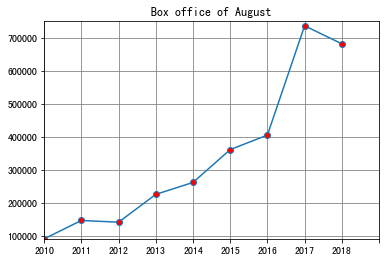

In [178]:
%matplotlib inline
import matplotlib.pyplot as plt

years = pd.to_datetime(total.index).year
fig, ax = plt.subplots()
ax.grid(color='gray')
ax.set_xlim((1, 10))
ax.set_ylim((91600, 750000))
ax.plot(range(1, 10), total.values, marker='o', markerfacecolor='r')
ax.set_xticklabels(years)
ax.set_title("Box office of August")

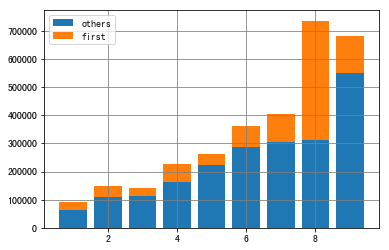

In [182]:
first = box_office.loc[0].astype(np.int)    #历年票房第一
after_first = total - first    #其它影片票房收入

fig, ax = plt.subplots()
ax.grid(color='gray')
ax.bar(range(1, 10), after_first.values, label='others')    #①
ax.bar(range(1, 10), first.values, bottom=after_first.values, label='first')    #②
plt.legend(loc=0)

### 处理重复数据

1. 识别重复数据

pandas.DataFrame.duplicated(self, subset=None, keep='first')

pandas.Series.duplicated(self, keep='first')

返回值：标记记录是否是重复，重复为True，不重复为False

参数：

- subset：用于识别重复的列标签或列标签序列，默认所有列标签

- keep
    - ‘frist’：除了第一次出现外，其余相同的被标记为重复
    - 'last'：除了最后一次出现外，其余相同的被标记为重复
    - False：所有相同的都被标记为重复

In [93]:
d = {
    'Name':['Alisa','Bobby','jodha','jack','raghu','Cathrine',
            'Alisa','Bobby','kumar','Alisa','Alex','Cathrine'],
    'Age':[26,24,23,22,23,24,26,24,22,23,24,24],
      
       'Score':[85,63,55,74,31,77,85,63,42,62,89,77]}
 
df = pd.DataFrame(d,columns=['Name','Age','Score'])
df

,Name,Age,Score
0,Alisa,26,85
1,Bobby,24,63
2,jodha,23,55
3,jack,22,74
4,raghu,23,31
5,Cathrine,24,77
6,Alisa,26,85
7,Bobby,24,63
8,kumar,22,42
9,Alisa,23,62


In [94]:
df.duplicated()    #keep='first'

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7      True
8     False
9     False
10    False
11     True
dtype: bool

In [96]:
df.duplicated('Age', keep='last')    #判断某列是否重复

0      True
1      True
2      True
3      True
4      True
5      True
6     False
7      True
8     False
9     False
10     True
11    False
dtype: bool

In [98]:
df.duplicated(['Age', 'Score']) 

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7      True
8     False
9     False
10    False
11     True
dtype: bool

2. 删除重复记录

drop_duplicates函数用于删除Series、DataFrame中重复记录，并返回删除重复后的结果

pandas.DataFrame.drop_duplicates(self, subset=None, keep='first', inplace=False)

pandas.Series.drop_duplicates(self, keep='first', inplace=False)

In [99]:
df.drop_duplicates()

,Name,Age,Score
0,Alisa,26,85
1,Bobby,24,63
2,jodha,23,55
3,jack,22,74
4,raghu,23,31
5,Cathrine,24,77
8,kumar,22,42
9,Alisa,23,62
10,Alex,24,89


In [100]:
df.drop_duplicates("Age")

,Name,Age,Score
0,Alisa,26,85
1,Bobby,24,63
2,jodha,23,55
3,jack,22,74


### 处理缺失数据

1. 缺失值的标记

None是一个python特殊的对象， 但是NaN却是用一个特殊的float

In [101]:
type(None)

NoneType

In [103]:
from numpy import NaN
type(NaN)

float

In [104]:
s = pd.Series([1, 2, None, NaN])    #自动推测，都是浮点数
s

0    1.0
1    2.0
2    NaN
3    NaN
dtype: float64

In [105]:
s.sum()    #默认不参与运算

3.0

In [106]:
s = pd.Series(["a", 1, 2, np.nan])    #np.nan,即NaN
s

0      a
1      1
2      2
3    NaN
dtype: object

In [112]:
pd.to_numeric(s, errors='coerce')    

0    NaN
1    1.0
2    2.0
3    NaN
dtype: float64

2. 检测缺失值

“老司机”，擅长找出缺失值——要熟悉业务。

一般说来，在某一个领域经验多些，对自己的数据产生的背景及过程了解的也就多些，对自己数据中的缺失值认识就会更有把握，也能比较快的去选择恰当的方法解决这个问题。

In [113]:
# 查看是否缺失值

df = pd.DataFrame({"one":[1, 2, np.nan], "two":[np.nan, 3, 4]})
df

,one,two
0,1.0,NaN
1,2.0,3.0
2,NaN,4.0


In [114]:
df.isnull()

,one,two
0,False,True
1,False,False
2,True,False


In [118]:
#缺失率, 每列
(df.shape[0] - df.count()) / df.shape[0]

one    0.333333
two    0.333333
dtype: float64

In [120]:
df.count()    #计算每列非空数据的个数

one    2
two    2
dtype: int64

In [119]:
(df.shape[1] - df.T.count()) / df.shape[1]   #每行的缺失

0    0.5
1    0.0
2    0.5
dtype: float64

3. 数据缺失机制

- 完全变量：数据集中不含缺失值的变量（属性）
- 不完全变量：数据集中含有缺失值的变量（属性），

通常把缺失值的情况划分为三种：

- 完全随机缺失：（Missing Completely at Random，MCAR）。数据的缺失与不完全变量以及完全变量都是无关的。
- 随机缺失：（Missing at Random，MAR）。数据的缺失仅仅依赖于完全变量。
- 非随机、不可忽略缺失：Not Missing at Random,NMAR，or nonignorable）。不完全变量中数据的缺失依赖于不完全变量本身，这种缺失是不可忽略的。

把分类搞得再清楚，也不如动手做。

4. 处理方法

**方法1：删除法**

通常用于数据量较大，并且：

- 删除后，不会引入偏差
- 删除列，不会使有重要预测作用的特征缺失

慎用

In [121]:
df

,one,two
0,1.0,NaN
1,2.0,3.0
2,NaN,4.0


In [122]:
df.dropna()    #删除有缺失值的行

,one,two
1,2.0,3.0


In [123]:
df['one'].dropna()    #删除某列中的缺失值，并返回该列

0    1.0
1    2.0
Name: one, dtype: float64

In [126]:
df['three'] = [9, 8, 7]
df.dropna(axis=1)

,three
0,9
1,8
2,7


In [127]:
df.dropna(axis=0, how='all')    # all: If all values are NA, drop that row or column.

,one,two,three
0,1.0,NaN,9
1,2.0,3.0,8
2,NaN,4.0,7


In [133]:
df = pd.concat([df, pd.DataFrame({"one": [np.nan], "two": [np.nan], "three": [np.nan]})], ignore_index=True)
df    #生成一个新的DF数据，最后一行都是缺失值

,one,two,three
0,1.0,NaN,9.0
1,2.0,3.0,8.0
2,NaN,4.0,7.0
3,NaN,NaN,NaN


In [134]:
df.dropna(axis=0, how='all')

,one,two,three
0,1.0,NaN,9.0
1,2.0,3.0,8.0
2,NaN,4.0,7.0


**方法2：填补法**

人工填补，是最基本的方法，如果能够人工填补，可以使用。但是，对大数据，就比较难了。有的时候人工填补数据的成本也比较高。

此外，还有下面的各种填充方法。

但是，填充之后的数据，不一定能够完全反应原数据的规律，有可能引入新的误差。

有的算法对缺失数据敏感，所以，不得不进行填补。

以下演示常见的一些填充方法。

1. 用指定的数值填补

In [185]:
# 用指定的数值填补
df = pd.DataFrame({"one":[10, 11, 12], 'two':[np.nan, 21, 22], "three":[30, np.nan, 33]})
df

,one,two,three
0,10,NaN,30.0
1,11,21.0,NaN
2,12,22.0,33.0


In [187]:
df.fillna(0)    #所有缺失值用0填充, 这样做之后，并没有修改原来的df

,one,two,three
0,10,0.0,30.0
1,11,21.0,0.0
2,12,22.0,33.0


In [188]:
df

,one,two,three
0,10,NaN,30.0
1,11,21.0,NaN
2,12,22.0,33.0


In [189]:
df.fillna(0, inplace=True)    #inplace=True,修改原数据
df

,one,two,three
0,10,0.0,30.0
1,11,21.0,0.0
2,12,22.0,33.0


In [190]:
df = pd.DataFrame({'ColA':[1, np.nan, np.nan, 4, 5, 6, 7], 'ColB':[1, 1, 1, 1, 2, 2, 2]})
df

,ColA,ColB
0,1.0,1
1,NaN,1
2,NaN,1
3,4.0,1
4,5.0,2
5,6.0,2
6,7.0,2


In [191]:
df['ColA'].fillna(method='ffill')    #根据缺失值前面的值填充

0    1.0
1    1.0
2    1.0
3    4.0
4    5.0
5    6.0
6    7.0
Name: ColA, dtype: float64

In [192]:
df['ColA'].fillna(method='bfill')    #根据缺失值后面的值填充

0    1.0
1    4.0
2    4.0
3    4.0
4    5.0
5    6.0
6    7.0
Name: ColA, dtype: float64

In [194]:
# 使用所在列的已有数据的平均数填充。适合于正态分布的数据。
# 比如身高，1000个人的身高数据中，如果有10个缺失，可以计算已有数据的平均值，填充缺失值。
# 这种缺失往往是随机性的
persons = pd.read_csv("/Users/qiwsir/Documents/Codes/DataSet/body-information/500_Person_Gender_Height_Weight_Index.csv")
persons.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [197]:
pdf = persons.sample(20)
pdf.dtypes

Gender    object
Height     int64
Weight     int64
Index      int64
dtype: object

In [196]:
pdf['Height'].mean()

168.2

In [198]:
pdf['Height-na'] = np.where(pdf['Height'] % 5 == 0, np.nan, pdf['Height'])    #制造一批缺失值
pdf

,Gender,Height,Weight,Index,Height-na
117,Female,146,104,5,146.0
473,Male,195,153,5,NaN
241,Male,166,61,2,166.0
44,Female,182,126,4,182.0
296,Female,169,88,2,169.0
372,Male,185,60,1,NaN
27,Male,187,62,1,187.0
41,Female,149,108,5,149.0
468,Male,161,115,5,161.0
159,Male,181,105,4,181.0


In [199]:
pdf['Height-na'].mean()

168.28571428571428

In [200]:
pdf['Height-na'].fillna(pdf['Height-na'].mean(), inplace=True)


In [202]:
pdf[['Height-na', 'Height']].mean()    #比较填充了平均值之后的效果。

Height-na    168.285714
Height       169.550000
dtype: float64

除了使用平均数或者中位数之外，在某些情况下也可以使用众数。或者使用某些条件下已有数据的平均数、中位数和众数填充。

比如：对社会群体中工作者的薪酬，对于某些缺失数据，就可以使用某个条件下的众数填充。

另外，对于用指定数据填充的情况，有的资料提出可以使用”unknown“填充。这种方法通常不推荐，很可能导致比较大的偏差

在机器学习中，有一个非常通用的库，scikit-learn，网站：https://scikit-learn.org/stable/

安装方法: pip install scikit-learn

在这个库里面，提供了一个名为SimpleImputer的模块，使用它，可以完成：

- 均值填充
- 中位数填充
- 众数填充

In [213]:
pdf2 = persons.sample(20)
pdf2['Height-na'] = np.where(pdf2['Height'] % 5 == 0, np.nan, pdf2['Height'])
pdf2

,Gender,Height,Weight,Index,Height-na
185,Male,165,80,3,NaN
202,Female,156,89,4,156.0
330,Female,164,160,5,164.0
455,Male,176,77,2,176.0
379,Male,176,87,3,176.0
173,Female,196,131,4,196.0
80,Male,164,75,3,164.0
162,Male,192,101,3,192.0
198,Female,166,144,5,166.0
211,Male,148,155,5,148.0


In [227]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')    
# strategy：替换策略，字符串，默认用均值‘mean’替换
# 若为median时，用特征列的中位数替换
# 若为most_frequent时，用特征列的众数替换
col_values = imp_mean.fit_transform(pdf2['Height-na'].values.reshape((-1, 1)))
col_values

array([[169.25],
       [156.  ],
       [164.  ],
       [176.  ],
       [176.  ],
       [196.  ],
       [164.  ],
       [192.  ],
       [166.  ],
       [148.  ],
       [182.  ],
       [161.  ],
       [167.  ],
       [168.  ],
       [169.25],
       [171.  ],
       [177.  ],
       [169.25],
       [169.25],
       [144.  ]])

2. 热卡填充

对于某个有缺失值的特征，在数据中找到一个与它最相似的特征，然后用这个相似特征的值来进行填充。

不同的问题可能会选用不同的标准来对相似进行判定。

最常见的是使用相关系数矩阵来确定哪个特征Y与缺失值所在特征X最相关。然后把所有变量按Y的取值大小进行排序。那么变量X的缺失值就可以用排在缺失值前的那个个案的数据来代替了。

缺点：太麻烦。与均值替换法相比，利用热卡填充法插补数据后，其变量的标准差与插补前比较接近。但在回归方程中，使用热卡填充法容易使得回归方程的误差增大，参数估计变得不稳定，而且这种方法使用不便，比较耗时。

In [203]:
df = pd.DataFrame({"one":np.random.randint(1, 100, 10), 
                   "two": [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                  "three":[5, 9, 13, np.nan, 21, np.nan, 29, 33, 37, 41]})
df

,one,two,three
0,74,2,5.0
1,69,4,9.0
2,21,6,13.0
3,29,8,NaN
4,63,10,21.0
5,66,12,NaN
6,21,14,29.0
7,10,16,33.0
8,43,18,37.0
9,85,20,41.0


In [204]:
df.corr()    #计算每列之间的相关系数，即相关系数矩阵,计算的是pearson相关系数

,one,two,three
one,1.000000,-0.110073,-0.174729
two,-0.110073,1.000000,1.000000
three,-0.174729,1.000000,1.000000


In [211]:
df['new_three'] = np.where(df['three'].isnull()==True, df['two'], df['three'])
df

#下面是填充结果。但是，对于上述举例，事实上，用后面的”回归预测“方式进行填充更好。

,one,two,three,new_three
0,74,2,5.0,5.0
1,69,4,9.0,9.0
2,21,6,13.0,13.0
3,29,8,NaN,8.0
4,63,10,21.0,21.0
5,66,12,NaN,12.0
6,21,14,29.0,29.0
7,10,16,33.0,33.0
8,43,18,37.0,37.0
9,85,20,41.0,41.0


3. K最近邻法填充

先根据欧式距离、马氏距离或相关分析来确定距离具有缺失数据样本最近的K个样本，将这K个值加权平均来估计该样本的缺失数据。

在sklearn中，有KNN模块，具体内容参考：

https://scikit-learn.org/stable/modules/neighbors.html

用这个方法是可以实现缺失值填充的。但是，总有好事之徒优化出更好的工具。

https://github.com/epsilon-machine/missingpy

这是一个专门利用sklearn中的KNN的API，发展而来的一个填充工具。

pip install missingpy

In [228]:
df = pd.DataFrame([[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]])

In [229]:
df

,0,1,2
0,1.0,2,NaN
1,3.0,4,3.0
2,NaN,6,5.0
3,8.0,8,7.0


In [231]:
from missingpy import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputer.fit_transform(df)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

以”填充方法“处理缺失值，是比较常用的。为此，工具当然要好用。刚才这个工具仅仅是用KNN方法填充，还有一个综合了多种填充方法的工具。

impyute: https://impyute.readthedocs.io/en/master/

安装：pip install impyute


Feature Support

- Imputation of Cross Sectional Data
    - K-Nearest Neighbours
    - Multivariate Imputation by Chained Equations
    - Expectation Maximization
    - Mean Imputation
    - Mode Imputation
    - Median Imputation
    - Random Imputation

- Imputation of Time Series Data
    - Last Observation Carried Forward
    - Moving Window
    - Autoregressive Integrated Moving Average (WIP)

- Diagnostic Tools
    - Loggers
    - Distribution of Null Values
    - Comparison of imputations
    - Little’s MCAR Test (WIP)



In [233]:
df = pd.DataFrame([[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]])
df

,0,1,2
0,1.0,2,NaN
1,3.0,4,3.0
2,NaN,6,5.0
3,8.0,8,7.0


In [234]:
import impyute as impy
impy.mean(df)    #用均值填充

,0,1,2
0,1.0,2.0,5.0
1,3.0,4.0,3.0
2,4.0,6.0,5.0
3,8.0,8.0,7.0


In [235]:
data = np.arange(25).reshape((5, 5)).astype(np.float)
data[0][2] =  np.nan
data

array([[ 0.,  1., nan,  3.,  4.],
       [ 5.,  6.,  7.,  8.,  9.],
       [10., 11., 12., 13., 14.],
       [15., 16., 17., 18., 19.],
       [20., 21., 22., 23., 24.]])

In [236]:
impy.fast_knn(data, k=1)    #k=1,各个值权重一样，且考虑最近的1个近邻

array([[ 0.,  1.,  7.,  3.,  4.],
       [ 5.,  6.,  7.,  8.,  9.],
       [10., 11., 12., 13., 14.],
       [15., 16., 17., 18., 19.],
       [20., 21., 22., 23., 24.]])

In [237]:
impy.fast_knn(data, k=2)    #k=1,各个值权重一样，且考虑最近的2个近邻

array([[ 0.        ,  1.        , 10.08608891,  3.        ,  4.        ],
       [ 5.        ,  6.        ,  7.        ,  8.        ,  9.        ],
       [10.        , 11.        , 12.        , 13.        , 14.        ],
       [15.        , 16.        , 17.        , 18.        , 19.        ],
       [20.        , 21.        , 22.        , 23.        , 24.        ]])

In [238]:
impy.fast_knn(data, k=3)    #k=1,各个值权重一样，且考虑最近的3个近邻

array([[ 0.        ,  1.        , 13.40249283,  3.        ,  4.        ],
       [ 5.        ,  6.        ,  7.        ,  8.        ,  9.        ],
       [10.        , 11.        , 12.        , 13.        , 14.        ],
       [15.        , 16.        , 17.        , 18.        , 19.        ],
       [20.        , 21.        , 22.        , 23.        , 24.        ]])

In [241]:
impy.fast_knn(data, k=5)    #k=5,已经超过了数据集的最大记录

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/impyute/imputation/cs/fast_knn.py:113: RuntimeWarning: invalid value encountered in true_divide
  weights = distances/np.sum(distances)


IndexError: index 5 is out of bounds for axis 0 with size 5

**方法3：拟合缺失值**

根据已有数据的，找出数据的规律，用这个规律来得出缺失值。

1. 回归预测

比均值填补要可靠，因为它考虑到了其它因素的影响。但这种方法有一个问题：容易低估标准差，高估检验统计量。

In [242]:
df = pd.DataFrame({"one":np.random.randint(1, 100, 10), 
                   "two": [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                  "three":[5, 9, 13, np.nan, 21, np.nan, 29, 33, 37, 41]})
df    # 前面创造的用于热卡填充的数据 two*2 + 1

,one,two,three
0,77,2,5.0
1,29,4,9.0
2,41,6,13.0
3,72,8,NaN
4,41,10,21.0
5,79,12,NaN
6,44,14,29.0
7,3,16,33.0
8,22,18,37.0
9,46,20,41.0


In [244]:
df_train = df.dropna()    #训练集
df_train

,one,two,three
0,77,2,5.0
1,29,4,9.0
2,41,6,13.0
4,41,10,21.0
6,44,14,29.0
7,3,16,33.0
8,22,18,37.0
9,46,20,41.0


In [246]:
df_test = df[df['three'].isnull()]    #测试集
df_test

,one,two,three
3,72,8,NaN
5,79,12,NaN


In [258]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(df_train['two'].values.reshape(-1, 1), df_train['three'].values.reshape(-1, 1))
df_three_pred = regr.predict(df_test['two'].values.reshape(-1, 1))
df_three_pred

array([[17.],
       [25.]])

In [313]:
tdf = pd.DataFrame(df_three_pred, columns=["three"], index=[3, 5])    #利用得到的结果构造一个DF，注意索引
tdf

,three
3,17.0
5,25.0


In [315]:
df_test.update(tdf)    #更测试练集。
df_test

,one,two,three
3,72,8,17.0
5,79,12,25.0


In [316]:
df.update(df_test)    #用测试集的数据填补原有的数据集
df

,one,two,three
0,77.0,2.0,5.0
1,29.0,4.0,9.0
2,41.0,6.0,13.0
3,72.0,8.0,17.0
4,41.0,10.0,21.0
5,79.0,12.0,25.0
6,44.0,14.0,29.0
7,3.0,16.0,33.0
8,22.0,18.0,37.0
9,46.0,20.0,41.0


2. 随机森林法

In [325]:
train_data = pd.read_csv("/Users/qiwsir/Documents/Codes/DataSet/kaggle/train.csv")
train_data.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [326]:
(train_data.shape[0] - train_data.count()) / train_data.shape[0]    #计算每列的缺失率

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [331]:
#对Age列进行缺失值填补，利用随机森林方法
df = train_data[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]    #可能跟年龄有关的特征
known_age = df[df['Age'].notnull()].values
unknown_age = df[df['Age'].isnull()].values

y = known_age[:, 0]
X = known_age[:, 1:]

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
rfr.fit(X, y)

pred_age = rfr.predict(unknown_age[:, 1:])
pred_age

array([23.83895259, 32.06649305, 29.51820514, 29.51820514, 22.38011324,
       27.94720616, 36.10804822, 35.2958243 , 22.87630686, 27.94720616,
       30.70572678, 33.12898535, 35.2958243 , 23.45968333, 44.06483036,
       41.20008848, 17.09991595, 27.94720616, 30.70572678, 23.32262739,
       30.70572678, 30.70572678, 27.94720616, 27.51545426, 33.55117591,
       30.70572678, 35.2958243 , 25.78337698, 25.34409583, 29.78279613,
       25.52340334, 10.86986696, 26.03188214, 49.5542756 ,  7.30954704,
       10.86986696, 31.71894048, 46.24976824, 33.12898535, 35.2958243 ,
       35.2958243 , 10.86986696, 31.09342985, 27.94720616,  7.30954704,
       31.10838452, 20.80015413, 33.12898535, 29.78279613, 34.62028571,
       35.2958243 , 35.2958243 , 36.87489821, 35.2958243 , 35.05181757,
       57.74249226, 41.20008848, 41.57487718, 35.2958243 , 23.31368333,
       42.57451554, 30.70572678, 28.57888393, 10.86986696, 23.31368333,
       31.42587794, 27.94720616, 26.68916849, 59.96916448, 29.51

In [332]:
train_data.loc[(train_data.Age.isnull()), 'Age'] = pred_age
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,23.838953,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


除了以上方法拟合缺失值之外，还可以使用其他拟合方式：

- 极大似然估计
- 多值填补
- 拉格朗日、牛顿插值

这些方法，在sklearn中都有相应的模块解决，解决方法同上。

**方法4：不处理**

在机器学习，特别是深度学习中，有一些算法对缺失值不敏感，所以可以不处理。

### 处理离群值

1. 离群值的产生原因：

- 测量错误（误差太大的可以视为错误）
- 输入有误

2. 识别方法

- 直方图。绘制数据直方图，落在图形两端并距离均数的个体值可能就是离群值

- 散点图。

- 箱线图。绘制箱式图，如果个体值距离箱式图底线（25% 线）和顶线（75%线）的距离过大，一般为四分位数间距（箱体高度）的1.5倍至3倍时被视为离群点；而个体值距离箱体底线或顶线距离超过3倍的箱体高度被视为离群值。

- 3σ方法。如果数据整体服从正太分布，一般在均数加减三个标准差之外的值被称为离群值。

- Q检验法。当数据整体不服从正太分布的时候，用Q检验。当数据量大于10的时候，Q检验Q＞0.33，则该可疑离群值舍去，否则保留。

- 基于分布的异常值检测

- 马氏距离。马氏距离（Mahalanobis distance）法是判别多变量离群值的一个常用方法。